In [54]:
!pip install langchain-groq
!pip install dotenv

In [55]:
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph
from typing import TypedDict, List
from dotenv import load_dotenv
from langchain_groq import ChatGroq

In [56]:
class AgentState(TypedDict):
    messages:str

In [57]:
load_dotenv()
llm = ChatGroq(
    model="qwen/qwen3-32b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
)


In [58]:
def simple_node(state: AgentState) -> AgentState:
    """This node will handle the user input for the LLM to answer"""
    response = llm.invoke([HumanMessage(content=state["messages"])])
    print(response.content)
    return {"messages": response.content}

In [59]:
graph=StateGraph(AgentState)
graph.add_node("bot", simple_node)
graph.set_entry_point("bot")
graph.set_finish_point("bot")
app=graph.compile()

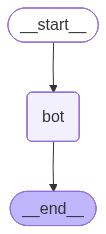

In [60]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [61]:
app.invoke({'messages':"Hello Groq"})

Hello! However, I need to clarify that I am not Groq. I am Qwen, a large language model developed by Tongyi Lab. How can I assist you today?


{'messages': 'Hello! However, I need to clarify that I am not Groq. I am Qwen, a large language model developed by Tongyi Lab. How can I assist you today?'}